In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib as mpl

In [4]:
file = 'source_data/zumacin_scrubbed.csv'

In [5]:
df = pd.read_csv(file, encoding="ISO-8859-1")

In [6]:
df.head()

,SAMPLE_NUMBER,Assay Date,Compartment Temp,Reagent-A ID,Reagent-A ID Exp Date,Reagent-B Exp Date,Reagent-B ID,Material-A ID,Reagent-C Lot,Reagent-D Lot,Reagent-E Lot,Reagent-F Concentration,Reagent-F Expiration,Reagent-F Lot,SOP Version,Agg%,INSTRUMENT,Main%,Lab_Site,Chemist
0,120629,01/28/2011,4.3,ReagentA-1-32,04/25/2011,NaN,NaN,MaterialA-1-554,NaN,NaN,ReagentE-1-394,NaN,01/31/2012,ReagentF-1-779,5.6,5.90580,30.0,88.62140,Stat,ChemistO
1,126733,02/15/2011,4.3,ReagentA-2-654,05/12/2011,02/23/2011,ReagentB-2-867,MaterialA-2-47,NaN,NaN,ReagentE-1-394,NaN,01/31/2012,ReagentF-1-779,5.6,6.09960,84.0,88.35680,Park,ChemistV
2,134380,03/04/2011,4.6,ReagentA-1-32,04/25/2011,NaN,NaN,MaterialA-3-451,NaN,NaN,ReagentE-2-800,NaN,01/31/2012,ReagentF-1-779,5.6,5.92722,37.0,88.49498,Stat,ChemistO
3,140369,03/23/2011,4.3,ReagentA-3-383,06/14/2011,03/30/2011,ReagentB-3-584,MaterialA-2-47,NaN,NaN,ReagentE-1-394,NaN,01/31/2012,ReagentF-1-779,5.6,6.05880,53.0,88.39796,Park,ChemistV
4,142003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#drop null values in the assay date column
df = df.dropna(subset=['Assay Date'])

In [9]:
df.fillna(value=0)

,SAMPLE_NUMBER,Assay Date,Compartment Temp,Reagent-A ID,Reagent-A ID Exp Date,Reagent-B Exp Date,Reagent-B ID,Material-A ID,Reagent-C Lot,Reagent-D Lot,Reagent-E Lot,Reagent-F Concentration,Reagent-F Expiration,Reagent-F Lot,SOP Version,Agg%,INSTRUMENT,Main%,Lab_Site,Chemist
0,120629,01/28/2011,4.3,ReagentA-1-32,04/25/2011,0,0,MaterialA-1-554,0,0,ReagentE-1-394,0.0,01/31/2012,ReagentF-1-779,5.6,5.905800,30.0,88.621400,Stat,ChemistO
1,126733,02/15/2011,4.3,ReagentA-2-654,05/12/2011,02/23/2011,ReagentB-2-867,MaterialA-2-47,0,0,ReagentE-1-394,0.0,01/31/2012,ReagentF-1-779,5.6,6.099600,84.0,88.356800,Park,ChemistV
2,134380,03/04/2011,4.6,ReagentA-1-32,04/25/2011,0,0,MaterialA-3-451,0,0,ReagentE-2-800,0.0,01/31/2012,ReagentF-1-779,5.6,5.927220,37.0,88.494980,Stat,ChemistO
3,140369,03/23/2011,4.3,ReagentA-3-383,06/14/2011,03/30/2011,ReagentB-3-584,MaterialA-2-47,0,0,ReagentE-1-394,0.0,01/31/2012,ReagentF-1-779,5.6,6.058800,53.0,88.397960,Park,ChemistV
5,142895,03/30/2011,0.0,ReagentA-1-32,04/25/2011,0,0,MaterialA-5-420,0,0,ReagentE-2-800,0.0,01/31/2012,ReagentF-1-779,5.6,5.786970,33.0,88.725280,Stat,ChemistO
6,150741,04/19/2011,4.3,ReagentA-5-981,07/15/2011,0,0,MaterialA-3-451,0,0,ReagentE-2-800,0.0,01/31/2012,ReagentF-1-779,6.6,0.000000,33.0,0.000000,Stat,ChemistO
7,150958,04/20/2011,4.3,ReagentA-5-981,07/15/2011,0,0,MaterialA-3-451,0,0,ReagentE-2-800,0.0,01/31/2012,ReagentF-1-779,6.6,5.260140,33.0,89.005560,Stat,ChemistO
8,158404,05/09/2011,4.6,ReagentA-6-244,08/03/2011,0,0,MaterialA-5-420,0,0,ReagentE-2-800,0.0,01/31/2012,ReagentF-1-779,6.6,5.711490,33.0,88.729200,Stat,ChemistO
9,166625,05/27/2011,4.3,ReagentA-6-244,08/03/2011,0,0,MaterialA-6-778,0,0,ReagentE-2-800,0.0,01/31/2012,ReagentF-1-779,6.6,0.000000,30.0,0.000000,Stat,ChemistO
10,171505,06/08/2011,4.3,ReagentA-6-244,08/03/2011,0,0,MaterialA-5-420,0,0,ReagentE-2-800,0.0,01/31/2012,ReagentF-1-779,6.6,5.924670,41.0,88.571420,Stat,ChemistO


In [10]:
X=df.iloc[:, 17]
y=df.iloc[:, 15]

In [11]:
mpl.rcParams['figure.figsize'] = [14,8]

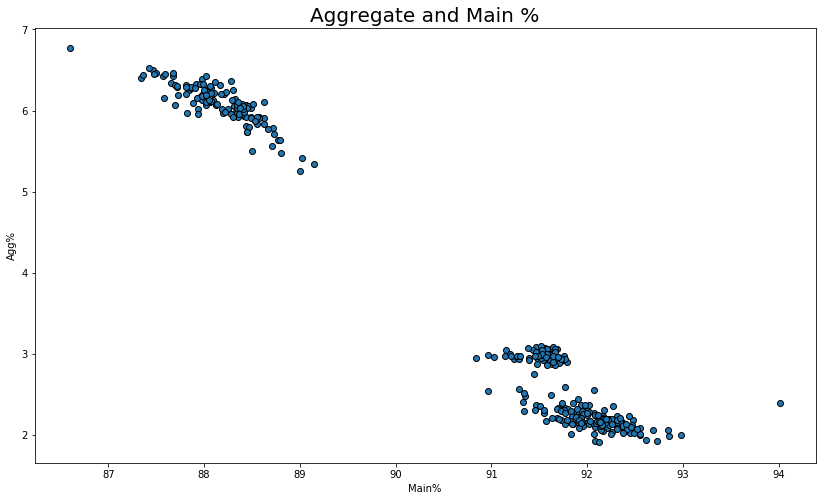

<Figure size 2160x1440 with 0 Axes>

In [12]:
plt.scatter(X,y, edgecolors="black")
plt.title("Aggregate and Main %", fontsize =20)
plt.ylabel('Agg%')
plt.xlabel('Main%')
plt.figure(figsize=(30,20))
plt.savefig("Images/Agg_main.png")

In [13]:
df.columns

Index(['SAMPLE_NUMBER', 'Assay Date', 'Compartment Temp', 'Reagent-A ID',
       'Reagent-A ID Exp Date', 'Reagent-B Exp Date', 'Reagent-B ID',
       'Material-A ID', 'Reagent-C Lot', 'Reagent-D Lot', 'Reagent-E Lot',
       'Reagent-F Concentration', 'Reagent-F Expiration', 'Reagent-F Lot',
       'SOP Version', 'Agg%', 'INSTRUMENT', 'Main%', 'Lab_Site', 'Chemist'],
      dtype='object')

In [14]:
organized_df = df[["Agg%","Main%"]]
organized_df.head()

,Agg%,Main%
0,5.90580,88.62140
1,6.09960,88.35680
2,5.92722,88.49498
3,6.05880,88.39796
5,5.78697,88.72528


In [15]:
organized_df.dropna(inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
organized_df.head()

,Agg%,Main%
0,5.90580,88.62140
1,6.09960,88.35680
2,5.92722,88.49498
3,6.05880,88.39796
5,5.78697,88.72528


In [17]:
data_array=np.array(organized_df)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [19]:
# Fit the model to the data
kmeans.fit(data_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# Predict the clusters
predicted_clusters = kmeans.predict(data_array)

In [21]:
mpl.rcParams['figure.figsize'] = [14,8]

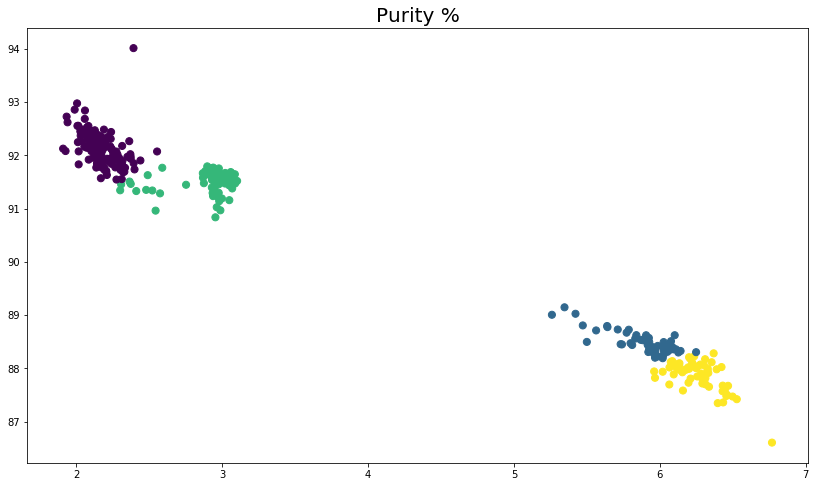

In [23]:
# vizualize if the that the model was trained correctly.
plt.scatter(data_array[:, 0], data_array[:, 1], c=predicted_clusters, s=50, cmap='viridis')
plt.title("Purity %", fontsize =20)

plt.savefig("Images/Purity.png")
